<a href="https://colab.research.google.com/github/RydNmr/Kaggle-House-Prices-Advanced-Regression-Techniques/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/RydNmr/Kaggle-House-Prices-Advanced-Regression-Techniques.git

Cloning into 'Kaggle-House-Prices-Advanced-Regression-Techniques'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 10 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 206.21 KiB | 2.22 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
# 関連ライブラリ
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
path = '/content/Kaggle-House-Prices-Advanced-Regression-Techniques/'

df_train = pd.read_csv(path + 'assets/train.csv')
df_test = pd.read_csv(path + 'assets/test.csv')

In [7]:
# 可視化
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
# 可視化
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df_train.shape[0], df_train.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は1460、変数は81種類です。
テストデータのデータ数は1459、変数は80種類です


| **Field Name**       | **Description (英語)**                                      | **説明 (日本語)**                                       |
|----------------------|-----------------------------------------------------------|-------------------------------------------------------|
| **SalePrice**         | The property's sale price in dollars. This is the target variable that you're trying to predict. | 不動産の販売価格（ドル単位）。予測対象の変数です。        |
| **MSSubClass**        | The building class.                                       | 建物のクラス。                                          |
| **MSZoning**          | The general zoning classification.                       | 一般的な用途地域の分類。                                |
| **LotFrontage**       | Linear feet of street connected to the property.          | 物件が接する通りの長さ（フィート）。                     |
| **LotArea**           | Lot size in square feet.                                 | 敷地面積（平方フィート）。                              |
| **Street**            | Type of road access.                                     | 道路へのアクセスの種類。                                |
| **Alley**             | Type of alley access.                                    | 路地へのアクセスの種類。                                |
| **LotShape**          | General shape of the property.                          | 物件の一般的な形状。                                    |
| **LandContour**       | Flatness of the property.                                | 土地の平坦さ。                                          |
| **Utilities**         | Type of utilities available.                            | 利用可能な公共施設の種類。                              |
| **LotConfig**         | Lot configuration.                                      | 敷地の構成。                                            |
| **LandSlope**         | Slope of the property.                                  | 土地の傾斜度。                                          |
| **Neighborhood**      | Physical locations within Ames city limits.             | エイムズ市内の地理的な場所。                            |
| **Condition1**        | Proximity to main road or railroad.                     | 主な道路または鉄道への近さ。                            |
| **Condition2**        | Proximity to main road or railroad (if a second is present). | 二つ目の道路または鉄道への近さ（存在する場合）。         |
| **BldgType**          | Type of dwelling.                                       | 住居の種類。                                            |
| **HouseStyle**        | Style of dwelling.                                      | 住居のスタイル。                                        |
| **OverallQual**       | Overall material and finish quality.                    | 全体的な材料と仕上げの品質。                            |
| **OverallCond**       | Overall condition rating.                               | 全体的な状態の評価。                                    |
| **YearBuilt**         | Original construction date.                             | 建築年。                                                |
| **YearRemodAdd**      | Remodel date.                                           | 改装年。                                                |
| **RoofStyle**         | Type of roof.                                           | 屋根の種類。                                            |
| **RoofMatl**          | Roof material.                                          | 屋根の材料。                                            |
| **Exterior1st**       | Exterior covering on house.                             | 家の外壁材。                                            |
| **Exterior2nd**       | Exterior covering on house (if more than one material). | 家の外壁材（複数の材料がある場合）。                     |
| **MasVnrType**        | Masonry veneer type.                                    | 外装仕上げ（石工）の種類。                               |
| **MasVnrArea**        | Masonry veneer area in square feet.                     | 外装仕上げ（石工）の面積（平方フィート）。               |
| **ExterQual**         | Exterior material quality.                              | 外壁の品質。                                            |
| **ExterCond**         | Present condition of the material on the exterior.      | 外壁材の現在の状態。                                    |
| **Foundation**        | Type of foundation.                                     | 基礎の種類。                                            |
| **BsmtQual**          | Height of the basement.                                 | 地下室の高さ。                                          |
| **BsmtCond**          | General condition of the basement.                      | 地下室の全体的な状態。                                  |
| **BsmtExposure**      | Walkout or garden level basement walls.                 | 地下室の壁が外に出ているかどうか。                      |
| **BsmtFinType1**      | Quality of basement finished area.                      | 地下室の仕上げ区域の品質。                              |
| **BsmtFinSF1**        | Type 1 finished square feet.                            | 地下室のタイプ1仕上げ面積（平方フィート）。              |
| **BsmtFinType2**      | Quality of second finished area (if present).           | 地下室の2つ目の仕上げ区域の品質（存在する場合）。         |
| **BsmtFinSF2**        | Type 2 finished square feet.                            | 地下室のタイプ2仕上げ面積（平方フィート）。              |
| **BsmtUnfSF**         | Unfinished square feet of basement area.                | 地下室の未仕上げ部分の面積（平方フィート）。             |
| **TotalBsmtSF**       | Total square feet of basement area.                     | 地下室全体の面積（平方フィート）。                      |
| **Heating**           | Type of heating.                                       | 暖房の種類。                                            |
| **HeatingQC**         | Heating quality and condition.                         | 暖房の品質と状態。                                      |
| **CentralAir**        | Central air conditioning.                              | セントラルエアコンの有無。                              |
| **Electrical**        | Electrical system.                                     | 電気設備のシステム。                                    |
| **1stFlrSF**          | First floor square feet.                               | 1階部分の面積（平方フィート）。                          |
| **2ndFlrSF**          | Second floor square feet.                              | 2階部分の面積（平方フィート）。                          |
| **LowQualFinSF**      | Low quality finished square feet (all floors).         | 低品質な仕上げの面積（全フロア）。                      |
| **GrLivArea**         | Above grade (ground) living area square feet.          | 地上部分の居住可能面積（平方フィート）。                 |
| **BsmtFullBath**      | Basement full bathrooms.                               | 地下室にあるフルバスルームの数。                        |
| **BsmtHalfBath**      | Basement half bathrooms.                               | 地下室にあるハーフバスルームの数。                      |
| **FullBath**          | Full bathrooms above grade.                            | 地上部分にあるフルバスルームの数。                      |
| **HalfBath**          | Half baths above grade.                                | 地上部分にあるハーフバスルームの数。                    |
| **Bedroom**           | Number of bedrooms above basement level.               | 地下室を除いた寝室の数。                                |
| **Kitchen**           | Number of kitchens.                                    | キッチンの数。                                          |
| **KitchenQual**       | Kitchen quality.                                       | キッチンの品質。                                        |
| **TotRmsAbvGrd**      | Total rooms above grade (does not include bathrooms).  | 地上部分の部屋の総数（バスルームを除く）。               |
| **Functional**        | Home functionality rating.                             | 家全体の機能評価。                                      |
| **Fireplaces**        | Number of fireplaces.                                  | 暖炉の数。                                              |
| **FireplaceQu**       | Fireplace quality.                                     | 暖炉の品質。                                            |
| **GarageType**        | Garage location.                                       | ガレージの位置。                                        |
| **GarageYrBlt**       | Year garage was built.                                 | ガレージの建築年。                                      |
| **GarageFinish**      | Interior finish of the garage.                         | ガレージ内部の仕上げ状態。                              |
| **GarageCars**        | Size of the garage in car capacity.                    | ガレージの車収容可能台数。                              |
| **GarageArea**        | Size of the garage in square feet.                     | ガレージの面積（平方フィート）。                        |
| **GarageQual**        | Garage quality.                                        | ガレージの品質。                                        |
| **GarageCond**        | Garage condition.                                      | ガレージの状態。                                        |
| **PavedDrive**        | Paved driveway.                                        | 舗装された車道の有無。                                  |
| **WoodDeckSF**        | Wood deck area in square feet.                         | 木製デッキの面積（平方フィート）。                      |
| **OpenPorchSF**       | Open porch area in square feet.                        | オープンポーチの面積（平方フィート）。                  |
| **EnclosedPorch**     | Enclosed porch area in square feet.                    | 屋内ポーチの面積（平方フィート）。                      |
| **3SsnPorch**         | Three season porch area in square feet.                | 三季用ポーチの面積（平方フィート）。                    |
| **ScreenPorch**       | Screen porch area in square feet.                      | スクリーンポーチの面積（平方フィート）。                |
| **PoolArea**          | Pool area in square feet.                              | プールの面積（平方フィート）。                          |
| **PoolQC**            | Pool quality.                                          | プールの品質。                                          |
| **Fence**             | Fence quality.                                         | フェンスの品質。                                        |
| **MiscFeature**       | Miscellaneous feature not covered in other categories. | 他のカテゴリーに含まれないその他の特徴。                 |
| **MiscVal**           | Value of miscellaneous features in dollars.            | その他の特徴の価値（ドル単位）。                        |
| **MoSold**            | Month Sold.                                            | 売却月。                                                |
| **YrSold**            | Year Sold.                                             | 売却年。                                                |
| **SaleType**          | Type of sale.                                          | 売却の種類。                                            |
| **SaleCondition**     | Condition of sale.                                     | 売却時の状態。                                          |

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


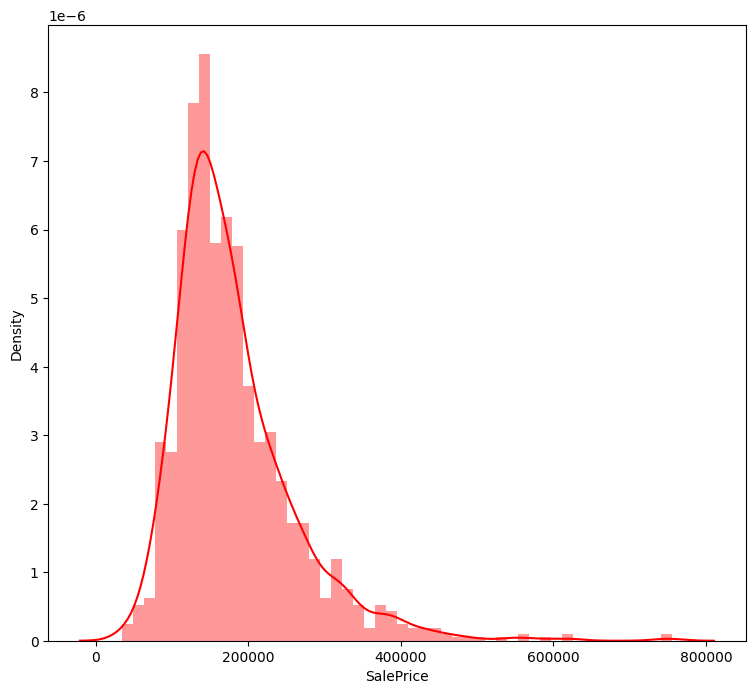

In [13]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='r', bins=50, hist_kws={'alpha': 0.4});